# Capstone Project - Car accident severity 

In [74]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

import seaborn as sns

from datetime import datetime as dt

import itertools

from sklearn import preprocessing

In [5]:
df_initial = pd.read_csv('/Users/apple/Desktop/xiaozao/Data-Collisions.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [6]:
df_initial.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.3231484,47.70314032,1,1307,1307,3502005,Matched,Intersection,37475,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.3472943,47.64717249,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.33454,47.60787143,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031,NaN,32,One parked--one moving,0,0,N
3,1,-122.3348033,47.60480289,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.3064263,47.54573946,5,17700,17700,1807429,Matched,Intersection,34387,...,Wet,Daylight,NaN,4028032,NaN,10,Entering at angle,0,0,N


In [7]:
print(df_initial.shape)

(194673, 38)


In [8]:
df_initial.columns = list(map(str, df_initial.columns))

In [9]:
df = df_initial[['PERSONCOUNT','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

In [10]:
df.head()

,PERSONCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN
1,2,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,4,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN
3,3,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN
4,2,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN


In [11]:
print(df.shape)

(194673, 8)


## 1. Data Cleansing

### 1.1 INCDTTM

In [ ]:
# split date and time, fill na with mean, convert into int for modeling

In [12]:
new = df["INCDTTM"].str.split(" ", n = 1, expand = True) 

In [13]:
df["Date"]= new[0] 
df["Time"]= new[1] 

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df.head()

,PERSONCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Date,Time
0,2,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,3/27/2013,2:54:00 PM
1,2,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,12/20/2006,6:55:00 PM
2,4,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,11/18/2004,10:20:00 AM
3,3,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,3/29/2013,9:26:00 AM
4,2,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,1/28/2004,8:04:00 AM


In [15]:
df["Date"] = pd.to_datetime(df['Date']).dt.weekday

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.head()

,PERSONCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Date,Time
0,2,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,2,2:54:00 PM
1,2,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,2,6:55:00 PM
2,4,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,3,10:20:00 AM
3,3,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,4,9:26:00 AM
4,2,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,2,8:04:00 AM


In [17]:
df["Time"] = pd.to_datetime(df['Time']).dt.strftime('%H')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

,PERSONCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Date,Time
0,2,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,2,14
1,2,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,2,18
2,4,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,3,10
3,3,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,4,09
4,2,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,2,08


In [109]:
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

df['Time'].fillna((df['Time'].mean()), inplace=True)

In [19]:
df.drop(['INCDTTM'], axis = 1, inplace = True)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df.head()

,PERSONCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Date,Time
0,2,NaN,N,Overcast,Wet,Daylight,NaN,2,14
1,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,2,18
2,4,NaN,0,Overcast,Dry,Daylight,NaN,3,10
3,3,NaN,N,Clear,Dry,Daylight,NaN,4,09
4,2,NaN,0,Raining,Wet,Daylight,NaN,2,08


### 1.2 INATTENTIONIND

In [ ]:
# assume nan means N, and therefore, fill nan with N
# convert N to 0 and Y to 1 for further modeling

In [21]:
df.INATTENTIONIND.unique()

array([nan, 'Y'], dtype=object)

In [22]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [23]:
df['INATTENTIONIND'].isna().sum()

164868

In [24]:
df['INATTENTIONIND'].fillna('N',inplace = True)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
df['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [80]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].replace(['Y'],'1')
df['INATTENTIONIND'] = df['INATTENTIONIND'].replace(['N'],'0')

df['INATTENTIONIND'] = df['INATTENTIONIND'].astype(int)

In [81]:
df['INATTENTIONIND'].value_counts()

0    159984
1     29805
Name: INATTENTIONIND, dtype: int64

### 1.3 UNDERINFL

In [ ]:
# convert N to 0 and Y to 1 for further modeling
# as NaN accounts only for a small part and hard to predict it, drop NaN rows

In [27]:
df.UNDERINFL.unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [28]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [29]:
df['UNDERINFL'].isna().sum()

4884

In [82]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['Y'],'1')
df['UNDERINFL'] = df['UNDERINFL'].replace(['N'],'0')

In [83]:
df['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [84]:
df = df.dropna(axis = 0, subset= ['UNDERINFL'])

In [86]:
df['UNDERINFL'] = df['UNDERINFL'].astype(int)

In [87]:
print(df.shape)

(189789, 10)


### 1.4 WEATHER

In [ ]:
# convert different weather factor type into int for further modeling
# fill NaN to Unknown type

In [35]:
df.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing', nan,
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [36]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [101]:
df['WEATHER'].fillna('Unknown',inplace = True)

df['WEATHER'] = df['WEATHER'].replace(['Clear'],'1')
df['WEATHER'] = df['WEATHER'].replace(['Raining'],'2')
df['WEATHER'] = df['WEATHER'].replace(['Overcast'],'3')
df['WEATHER'] = df['WEATHER'].replace(['Unknown'],'4')
df['WEATHER'] = df['WEATHER'].replace(['Snowing'],'5')
df['WEATHER'] = df['WEATHER'].replace(['Other'],'6')
df['WEATHER'] = df['WEATHER'].replace(['Fog/Smog/Smoke'],'7')
df['WEATHER'] = df['WEATHER'].replace(['Sleet/Hail/Freezing Rain'],'8')
df['WEATHER'] = df['WEATHER'].replace(['Blowing Sand/Dirt'],'9')
df['WEATHER'] = df['WEATHER'].replace(['Severe Crosswind'],'10')
df['WEATHER'] = df['WEATHER'].replace(['Sleet/Hail/Freezing Rain'],'11')
df['WEATHER'] = df['WEATHER'].replace(['Partly Cloudy'],'12')


df['WEATHER'] = df['WEATHER'].astype(int)

In [102]:
df['WEATHER'].value_counts()

1     111027
2      33121
3      27693
4      15046
5        901
6        826
7        569
8        113
9         55
10        25
12         5
Name: WEATHER, dtype: int64

### 1.5 ROADCOND

In [ ]:
# convert different roadcondition factor type into int for further modeling

In [38]:
df.ROADCOND.unique()

array(['Wet', 'Dry', 'Unknown', nan, 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [104]:
df['ROADCOND'].fillna('Unknown',inplace = True)

df['ROADCOND'] = df['ROADCOND'].replace(['Wet'],'1')
df['ROADCOND'] = df['ROADCOND'].replace(['Dry'],'2')
df['ROADCOND'] = df['ROADCOND'].replace(['Unknown'],'3')
df['ROADCOND'] = df['ROADCOND'].replace(['Snow/Slush'],'4')
df['ROADCOND'] = df['ROADCOND'].replace(['Ice'],'5')
df['ROADCOND'] = df['ROADCOND'].replace(['Other'],'6')
df['ROADCOND'] = df['ROADCOND'].replace(['Sand/Mud/Dirt'],'7')
df['ROADCOND'] = df['ROADCOND'].replace(['Standing Water'],'8')
df['ROADCOND'] = df['ROADCOND'].replace(['Oil'],'9')

df['ROADCOND'] = df['ROADCOND'].astype(int)

In [105]:
df['ROADCOND'].value_counts()

2    124300
1     47417
3     15075
5      1206
4       999
6       131
8       115
7        74
9        64
Name: ROADCOND, dtype: int64

### 1.6 LIGHTCOND

In [ ]:
# convert different light condition factors into int for further modeling
# drop NaN value as it only accounts for a small part and hard to predict based on current light condition data

In [41]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [92]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Daylight'],'1')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dark - Street Lights On'],'2')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Unknown'],'3')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dusk'],'4')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dawn'],'5')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dark - No Street Lights'],'6')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dark - Street Lights Off'],'7')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Other'],'8')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dark - Unknown Lighting'],'9')

df = df.dropna(axis = 0, subset= ['LIGHTCOND'])

df['LIGHTCOND'] = df['LIGHTCOND'].astype(int)

In [93]:
df['LIGHTCOND'].value_counts()

1    116095
2     48454
3     13464
4      5892
5      2502
6      1535
7      1193
8       235
9        11
Name: LIGHTCOND, dtype: int64

### 1.7 SPEEDING

In [ ]:
# assume that all NaN actually means that there is no speeding, so fill NaN with N
# convert N to 0 and Y to 1 for further modeling

In [43]:
df['SPEEDING'].fillna('N',inplace = True)

In [44]:
df['SPEEDING'].value_counts()

N    180456
Y      9333
Name: SPEEDING, dtype: int64

In [95]:
df['SPEEDING'] = df['SPEEDING'].replace(['Y'],'1')
df['SPEEDING'] = df['SPEEDING'].replace(['N'],'0')

df = df.dropna(axis = 0, subset= ['SPEEDING'])

df['SPEEDING'] = df['SPEEDING'].astype(int)

In [96]:
df['SPEEDING'].value_counts()

0    180061
1      9320
Name: SPEEDING, dtype: int64

### 1.8 PERSONCOUNT

In [ ]:
# user person count as a measurement to definde the level of car accident severity
# use bins to cut personcount to different levels of car accident
# severity level: 
#1 means only property damage (0 person involved)
#2 means light car accident(1-2 persons involved)
#3 means medium (3-5 persons involved)
#4 means high (5-10 persons involved)
#5 means heavy (more than 10 persons involved)

In [46]:
df['PERSONCOUNT'].value_counts()

2     111402
3      35142
4      14445
1      11728
5       6584
0       5541
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
17        11
15        11
16         8
20         6
25         6
18         6
44         6
19         5
22         4
26         4
47         3
37         3
29         3
28         3
27         3
32         3
34         3
36         2
30         2
24         2
21         2
23         2
54         1
31         1
53         1
48         1
57         1
43         1
35         1
81         1
41         1
39         1
Name: PERSONCOUNT, dtype: int64

In [47]:
df['PERSONCOUNT'].isna().sum()

0

In [48]:
df['PERSONCOUNT'] = df['PERSONCOUNT'].astype(int)

In [49]:
bins = [0,2,5,10,100]

PERSONCOUNT_cut = pd.cut(df['PERSONCOUNT'],bins)
pd.value_counts(PERSONCOUNT_cut)

(0, 2]       123130
(2, 5]        56171
(5, 10]        4710
(10, 100]       237
Name: PERSONCOUNT, dtype: int64

In [114]:
df['Severity_level'] = pd.cut(df['PERSONCOUNT'], bins, labels=['2','3','4','5']) 
# corresponding to the severity level of car accident: light,medium,high,heavy

In [115]:
df['Severity_level'] = df['Severity_level'].cat.add_categories('1')
df['Severity_level'].fillna('1', inplace =True) # level 1 means only property damage

In [116]:
df['Severity_level'].value_counts()

2    122814
3     56094
1      5535
4      4701
5       237
Name: Severity_level, dtype: int64

In [118]:
df.head()

,PERSONCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Date,Time,Severity_level
0,2,0,0,3,1,1,0,2,14.0,2
1,2,0,0,2,1,2,0,2,18.0,2
2,4,0,0,3,2,1,0,3,10.0,3
3,3,0,0,1,2,1,0,4,9.0,3
4,2,0,0,2,1,1,0,2,8.0,2


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189381 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PERSONCOUNT     189381 non-null  int64   
 1   INATTENTIONIND  189381 non-null  int64   
 2   UNDERINFL       189381 non-null  int64   
 3   WEATHER         189381 non-null  int64   
 4   ROADCOND        189381 non-null  int64   
 5   LIGHTCOND       189381 non-null  int64   
 6   SPEEDING        189381 non-null  int64   
 7   Date            189381 non-null  int64   
 8   Time            189381 non-null  float64 
 9   Severity_level  189381 non-null  category
dtypes: category(1), float64(1), int64(8)
memory usage: 14.6 MB


## 2.Data Exploration

### 2.1 relationship between Personcount and weekday

In [55]:
df.groupby('Date')['Severity_level'].value_counts()

Date  Severity_level
0     light             17295
      medium             7039
      prop_damage         737
      high                519
      heavy                31
1     light             18818
      medium             7550
      prop_damage         923
      high                485
      heavy                25
2     light             18757
      medium             7874
      prop_damage         816
      high                500
      heavy                31
3     light             19051
      medium             7958
      prop_damage         933
      high                566
      heavy                43
4     light             20416
      medium             9386
      prop_damage         898
      high                729
      heavy                44
5     light             15796
      medium             9229
      high               1055
      prop_damage         708
      heavy                38
6     light             12997
      medium             7135
      high         

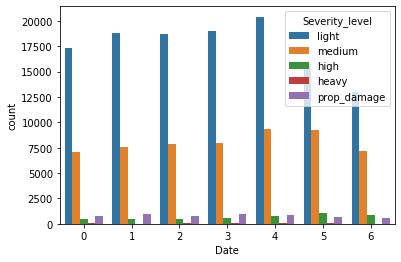

In [56]:
sns.countplot(x='Date',hue = 'Severity_level', data=df)

In [57]:
#### The frequency of light car accident is significantly lower during weekend (number 5 and 6)
#### Friday is more likely to have car accident no matter of the severity of the accident

### 2.2 relationship between Personcount and Time

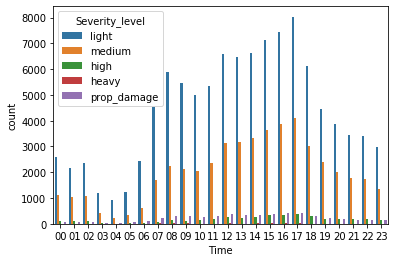

In [59]:
df_1 = df

df_1 = df_1.sort_values(by ='Time', ascending=True)

sns.countplot(x='Time',hue = 'Severity_level', data=df_1)

In [60]:
#### The frequency of car accident starts to increase after noon and reaches a peak at around 17h no matter of the car accident severity level

### 2.3 relationship between Personcount and INATTENTIONIND

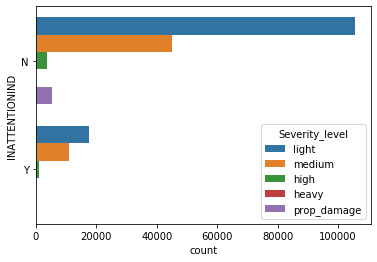

In [62]:
sns.countplot(y='INATTENTIONIND',hue = 'Severity_level', data=df)

In [63]:
#### It seems that Inattention is not a major reason for car accident no matter of the level of accident severity

### 2.4 relationship between Personcount and UNDERINFL

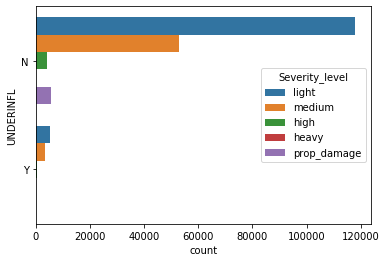

In [65]:
sns.countplot(y='UNDERINFL',hue = 'Severity_level', data=df)

In [66]:
#### It seems that drinking alcohol or having drugs are not a major reason for car accident no matter of the level of accident severity

## 2.5 relationship between Personcount and WEATHER

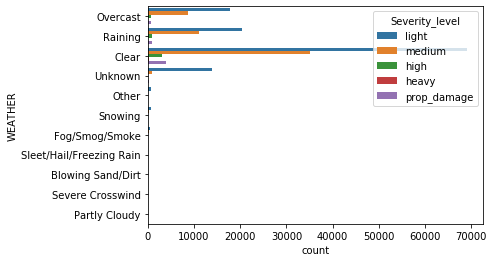

In [68]:
sns.countplot(y='WEATHER',hue = 'Severity_level', data=df)

In [69]:
### It's more likely to have car accident when the weather is clear no matter of the severity of the accident. 
### Based on the picture, Clear, Raining and Overcast are top three weathers that have the most cases of car accident.

## 2.6 relationship between Personcount and ROADCOND

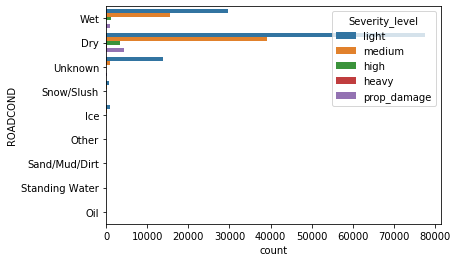

In [71]:
sns.countplot(y='ROADCOND',hue = 'Severity_level', data=df)

## 2.7 relationship between Personcount and LIGHTCOND

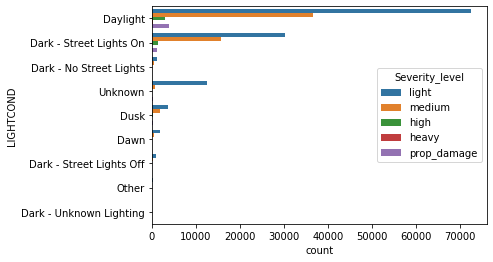

In [72]:
sns.countplot(y='LIGHTCOND',hue = 'Severity_level', data=df)

## 2.8 relationship between Personcount and SPEEDING

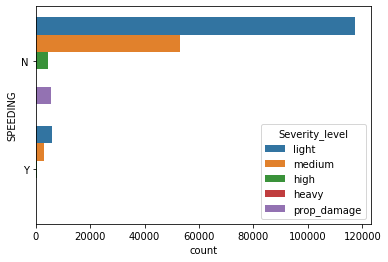

In [73]:
sns.countplot(y='SPEEDING',hue = 'Severity_level', data=df)

## 3. Modeling - Classification

In [ ]:
## mainly use classification as most of the attributes as well as the result are categorial instead of continuous.

### 3.1 K-Nearest Neighbours

### 3.1.1 Modeling

In [150]:
df.columns

Index(['PERSONCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'Date', 'Time', 'Severity_level'],
      dtype='object')

In [151]:
X = df[['INATTENTIONIND', 'UNDERINFL','WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Date', 'Time']].values  #.astype(float)
X[0:5]

array([[ 0.,  0.,  3.,  1.,  1.,  0.,  2., 14.],
       [ 0.,  0.,  2.,  1.,  2.,  0.,  2., 18.],
       [ 0.,  0.,  3.,  2.,  1.,  0.,  3., 10.],
       [ 0.,  0.,  1.,  2.,  1.,  0.,  4.,  9.],
       [ 0.,  0.,  2.,  1.,  1.,  0.,  2.,  8.]])

In [152]:
y = df['Severity_level'].values
y[0:5]

[2, 2, 3, 3, 2]
Categories (5, object): [2 < 3 < 4 < 5 < 1]

In [153]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.43153064, -0.22465736,  1.10539002, -1.29540164, -0.59517209,
        -0.22750876, -0.49063603,  0.14395928],
       [-0.43153064, -0.22465736,  0.20484081, -1.29540164,  0.34700296,
        -0.22750876, -0.49063603,  0.90638751],
       [-0.43153064, -0.22465736,  1.10539002,  0.19423906, -0.59517209,
        -0.22750876,  0.0294391 , -0.61846895],
       [-0.43153064, -0.22465736, -0.6957084 ,  0.19423906, -0.59517209,
        -0.22750876,  0.54951422, -0.80907601],
       [-0.43153064, -0.22465736,  0.20484081, -1.29540164, -0.59517209,
        -0.22750876, -0.49063603, -0.99968307]])

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151504, 8) (151504,)
Test set: (37877, 8) (37877,)


In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
k = 4
#Train Model and Predict  
severity = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
severity

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [157]:
yhat = severity.predict(X_test)
yhat[0:5]

array(['2', '2', '2', '2', '2'], dtype=object)

In [158]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, severity.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6250726053437533
Test set Accuracy:  0.6084959210074715


In [159]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    severity = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=severity.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53879663, 0.59130871, 0.56580511, 0.60849592, 0.59804103,
       0.6164427 , 0.60699105, 0.61958444, 0.61409299])

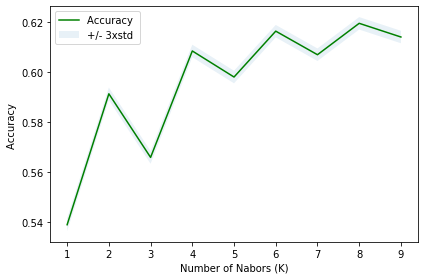

In [160]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [161]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.619584444385775 with k= 8


### 3.1.2 evaluation

In [163]:
#f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5485152621267533

In [165]:
#jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6140929851889009

### 3.2 Decision Tree

### 3.2.1 modeling

In [167]:
from sklearn.tree import DecisionTreeClassifier

SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [168]:
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
Severity_preTree = SeverityTree.predict(X_test)

print (Severity_preTree [0:5])
print (y_test [0:5])

['2' '2' '2' '2' '2']
[3, 2, 2, 2, 2]
Categories (5, object): [2 < 3 < 4 < 5 < 1]


In [170]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Severity_preTree))

DecisionTrees's Accuracy:  0.6495234575071943


### 3.2.2 evaluation

In [172]:
#f1_score
from sklearn.metrics import f1_score
f1_score(y_test, Severity_preTree, average='weighted') 

0.5115183054015588

In [173]:
#jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, Severity_preTree)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6495234575071943

### 3.3 Support Vector Machines

### 3.3.1 Modeling

In [139]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['2', '2', '2', '2', '2'], dtype=object)

### 3.3.2 evaluation

In [142]:
#f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5116738131896551

In [143]:
#jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6494442537687779

### 3.4 Regression

### 3.4.1 Modeling

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
yhat = LR.predict(X_test)
yhat

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [146]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.04878083, 0.62966311, 0.29346384, 0.02312814, 0.00496408],
       [0.03924567, 0.5954625 , 0.33210472, 0.02836402, 0.00482309],
       [0.02272244, 0.80545843, 0.15559975, 0.01165147, 0.0045679 ],
       ...,
       [0.01698475, 0.89581734, 0.07782648, 0.00519307, 0.00417837],
       [0.03018724, 0.62586928, 0.31270417, 0.02661666, 0.00462265],
       [0.0426027 , 0.59716447, 0.32087946, 0.03446633, 0.00488705]])

### 3.4.2 evaluation

In [147]:
#f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5137098410019448

In [148]:
#jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6492330437996674

In [149]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.819459786220243